In [1]:
from cell.word2vec_training_data import *
from cell.word2vec_model import *
from sklearn.decomposition import PCA
from sklearn import preprocessing
from cell import  utils, analysis, plot_utils

In [13]:
#tokens = tokenize(doc)
tokens = utils.read_list_of_lists_from_csv("/Users/fahimehb/Documents/NPP_GNN_project/dat/walks/VISp/test_layer/Undirected_Weighted_node2vec/N_1_l_1000000_p_1_q_1/test_layer/", "walk_1000000.csv")
tokens = tokens[0]
word_to_id, id_to_word = mapping(tokens)
X, Y = generate_training_data(tokens, word_to_id, 2)
vocab_size = len(id_to_word)
m = Y.shape[1]
# turn Y into one hot encoding
Y_one_hot = np.zeros((vocab_size, m))
Y_one_hot[Y.flatten(), np.arange(m)] = 1

In [14]:
len(tokens)

1000000

In [15]:
paras= skipgram_model_training(X, 
                        Y_one_hot, 
                        vocab_size, 
                        3, 
                        0.001, 
                        1000, 
                        batch_size=128, 
                        parameters=None, 
                        print_cost=False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


KeyboardInterrupt: 

### One walk with a length of 10000

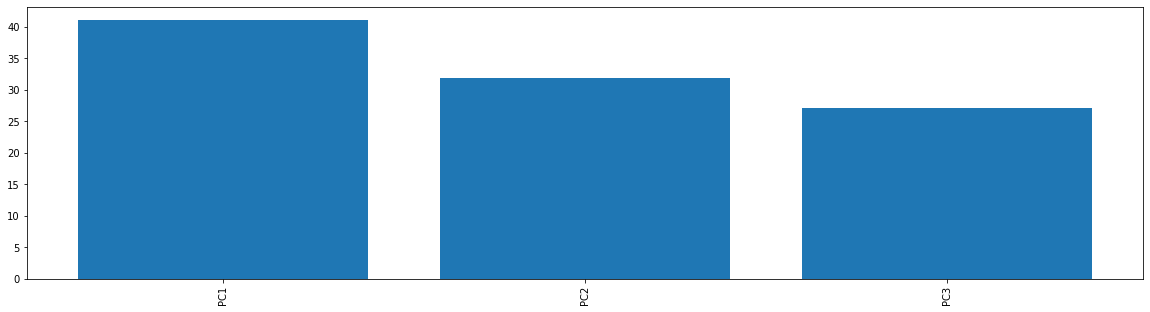

In [8]:
scaled_data = preprocessing.StandardScaler().fit_transform(paras['WRD_EMB'])
pca = PCA(n_components=3)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(20,5))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label= labels)
plt.xticks(rotation = 90)
plt.show()

In [9]:
pca.explained_variance_

array([1.24539067, 0.96698187, 0.82023616])

Reading cldf from: //Users/fahimehb/Documents/NPP_GNN_project/dat/cl_df_VISp_annotation.csv


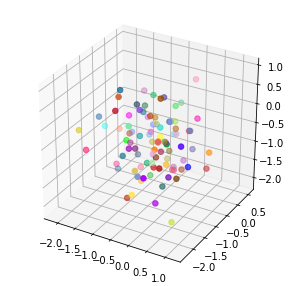

In [10]:
cldf = utils.read_visp_npp_cldf()
cldf.head()
data = analysis.summarize_walk_embedding_results(gensim_dict={"model": paras['WRD_EMB']},
                                                 index = word_to_id.keys(),
                                                 ndim=3, cl_df=cldf)
plot_utils.plot_embedding(data=data, cl_df=cldf, plot_dim=3, plot_size=(5,5))

### One walk with the length of 100000

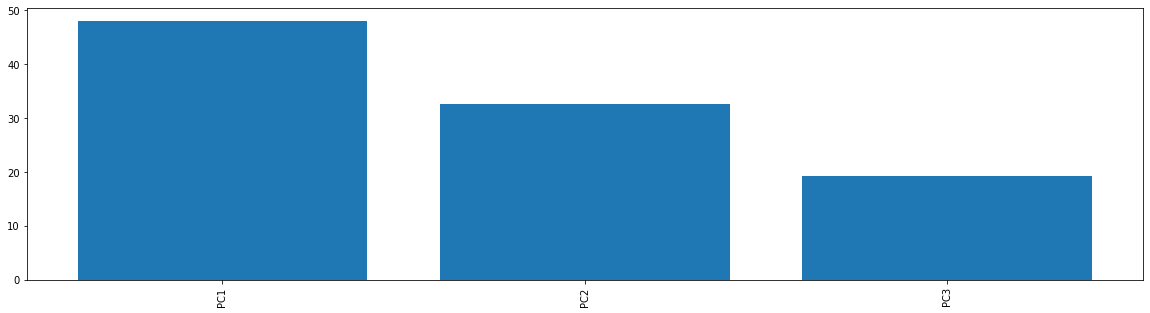

In [5]:
scaled_data = preprocessing.StandardScaler().fit_transform(paras['WRD_EMB'])
pca = PCA(n_components=3)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(20,5))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label= labels)
plt.xticks(rotation = 90)
plt.show()

In [6]:
pca.explained_variance_

array([1.45874416, 0.98903529, 0.58482925])

Reading cldf from: //Users/fahimehb/Documents/NPP_GNN_project/dat/cl_df_VISp_annotation.csv


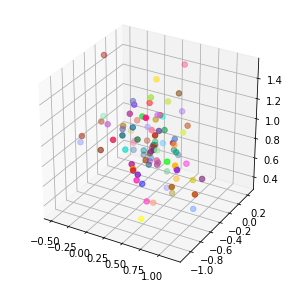

In [7]:
cldf = utils.read_visp_npp_cldf()
cldf.head()
data = analysis.summarize_walk_embedding_results(gensim_dict={"model": paras['WRD_EMB']},
                                                 index = word_to_id.keys(),
                                                 ndim=3, cl_df=cldf)
plot_utils.plot_embedding(data=data, cl_df=cldf, plot_dim=3, plot_size=(5,5))